Patryk Łyczko <br>
406785 <br>
EAIiIB <br>

#### Zadanie 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import networkx as nx

### Zadanie 1


In [2]:
def near_neigh(graph,start):
    vert = np.array([i for i in range(graph.shape[0])])
    # Zmienne pomocnicze:
    # cost - koszt trasy
    # path - ścieżka
    # visited - lista odwiedzonych wierzchołków
    cost = 0
    path = {}
    vistited = []

    # Ustawiamy wierzchołek obecnie ogladany na parametr start, dodajemy go do odwiedzonych 
    vert_looked = start
    vistited.append(start)
    next_vert = -1 # nastepny w kolejnosci wierzchołek

    ## Dopóki nie przejrzymy wszytskich wierzchołków 
    while (len(vistited) != graph.shape[0]):
        min_val = np.inf

        ## Znajdujemy najmniejszą wartość krawędzi 
        for i in vert:
            if i not in vistited:
                if graph[vert_looked][i] < min_val and graph[vert_looked][i] != 0:
                    min_val = graph[vert_looked][i]
                    next_vert = i

        ## Dodajemy wierzchołek z najmniejszą krawędzią do ścieżki dodajemy koszt trasy
        path[vert_looked + 1] = next_vert + 1
        cost += graph[vert_looked][next_vert]

        # Ustawiamy oglądany wierzchołek na nowo wybrany i dodajemy go do odwiedzonych 
        vert_looked = next_vert
        vistited.append(next_vert)

    # Jeżeli istnieje połączenie pomiędzy końcem a początkiem zwróć ścieżke, koszt jeżeli ni zwróc pusty słownik
    if graph[vistited[-1]][start] != 0:
        path[vistited[-1] + 1] = start + 1
        cost += graph[vistited[-1]][start]
        return path, cost
    else:
        return {}
    # print(path)
    


In [3]:

## Funkcja przyjmująca graf za argument, szuka dla możliwie każdego wierzchołka cykl Hamiltona 
## Algorytm Najbliższego sąsiada jest algorytmem 'zachłannym' wybierając coraz to nowe krawędzie z najmniejszą wagą może dojść do momentu kiedy 
## nie będzie od wstanie odwiedzić wszystkich wierzchołków (brak możliwych krawędzi), bądz wrócić do wierzchołka początkowego 
## Funkcja ta sprawdza możliwość rozpoczęcia od każdej krawędzi możliwość stworzenia cyklu
def find_best_trace(graph):
    vertx = np.array([i + 1 for i in range(10)])
    acc = 0
    while True:
        if acc > len(vertx):
            break
        valx = near_neigh(graph,acc)
        val = valx[0]
        acc += 1
        arr = []
        for a,b in val.items():
            if a in arr:
                pass
            else:
                arr.append(a)
            if b in arr:
                pass
            else:
                arr.append(b)
        arr.sort()
        if np.array_equal(arr, vertx):
            return valx
    return {},0
    
 
        

### Zadanie 2
Ważnym z punktu działania algorytmu cechami grafu jest stopień wierzchołka, możliwe jest występowanie wag ujemnych oraz cykli ujemnych.

In [4]:
graph = np.array([[0,2,1,4,3,0,0,5,0,0],#1
                    [2,0,0,3,0,0,5,0,0,0],#2
                    [1,0,0,7,1,2,3,0,3,0],#3
                    [4,3,7,0,0,4,4,3,1,0],#4
                    [3,0,1,0,0,3,0,0,7,0],#5
                    [0,0,2,4,3,0,3,0,0,1],#6
                    [0,0,0,4,0,3,0,2,0,0],#7
                    [5,0,0,3,0,0,2,0,0,2],#8
                    [0,0,3,1,7,0,0,0,0,1],#9
                    [0,0,0,0,0,1,0,2,1,0]])#10

Całkowity koszt przejścia trasy 23


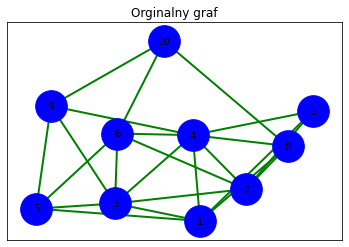

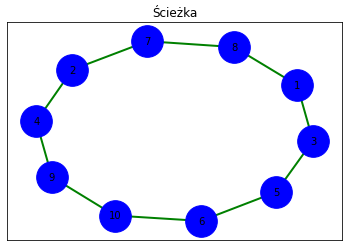

In [5]:
## Rysowanie grafów
s1,s2 = graph.shape
connections = []

for i in range(s1):
    for j in range(s2):
        if graph[i][j] != 0:
            connections.append((i + 1,j + 1))

val, sum = find_best_trace(graph)
if sum != 0:
    print(f"Całkowity koszt przejścia trasy {sum}")
    connections_v2 = []
    for i,j in val.items():
        connections_v2.append((i,j))


    Graph = nx.Graph()
    nodes = range(1,11)
    Graph.add_nodes_from(nodes)
    Graph.add_edges_from(connections)

    fig = plt.figure()
    pos = nx.spring_layout(Graph)
    plt.title("Orginalny graf")
    nx.draw_networkx_nodes(Graph,pos,node_color='b', node_size=1000)
    nx.draw_networkx_edges(Graph, pos, width=2,alpha=1, edge_color='g')
    labels = {i:str(i) for i in range(1,11)}
    nx.draw_networkx_labels(Graph,pos,labels=labels, font_size=10)
    plt.show()


    Graph = nx.Graph()
    nodes = range(1,11)
    Graph.add_nodes_from(nodes)
    Graph.add_edges_from(connections_v2)

    fig = plt.figure()
    pos = nx.spring_layout(Graph)
    plt.title("Ścieżka")
    nx.draw_networkx_nodes(Graph,pos,node_color='b', node_size=1000)
    nx.draw_networkx_edges(Graph, pos, width=2,alpha=1, edge_color='g')
    labels = {i:str(i) for i in range(1,11)}
    nx.draw_networkx_labels(Graph,pos,labels=labels, font_size=10)
    plt.show()


### Zadanie 3

#### Złożoność obliczeniowa algorytmu
Złożność obliczeniowa algorytmu dla grafu pełnego wynosi O(n^2)

#### Różnice
Mamy szanse na znalezienie względem danego grafu najkrótszej drogi dla danego grafu obejmującej wszystkie wierzchołki, ale nie mamy pewności połączenia końca drogi z jej początkiem
Różni się od innych algorytmów znaczącą prostotą budowy oraz wyborem ścieżki na podstawie wagi krawędzi. Nie wymaga sprawdzenia cykli oraz sortowania wag krawędzi.